# memory usage

monitoring to figure out why mvtec jobs are breaking with weird amounts of memory    # log["gpu"] = get_gpu(log["gpu.fpath"])   

parent: `005-memory-usage.ipynb`

In [57]:
# setup

# make a cell print all the outputs instead of just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from pathlib import Path

In [58]:
%pwd

'/home/jcasagrandebertoldo/repos/fcdd/python/analyse'

In [59]:
%ls data/

006-experiments-variability.df.index-names.json
006-experiments-variability.df.json
fcdd-mvtec-node24-3039980.mem.log
fcdd-mvtec-node24-3039984.mem.log
fcdd-mvtec-node25-3039981.mem.log
fcdd-mvtec-node25-3039986.mem.log
fcdd-mvtec-node26-3039982.mem.log
fcdd-mvtec-node26-3039985.mem.log
fcdd-mvtec-node27-3039983.mem.log
fcdd-mvtec-node27-3039987.mem.log
paper-table2-mvtec-perf.txt
results-report-rc2021@


In [60]:
LOGS_DIR = Path("data")

logs = [
    "fcdd-mvtec-node24-3039980.mem.log",
    "fcdd-mvtec-node24-3039984.mem.log",
    "fcdd-mvtec-node25-3039981.mem.log",
    "fcdd-mvtec-node25-3039986.mem.log",
    "fcdd-mvtec-node26-3039982.mem.log",
    "fcdd-mvtec-node26-3039985.mem.log",
    "fcdd-mvtec-node27-3039983.mem.log",
    "fcdd-mvtec-node27-3039987.mem.log",
]

from pathlib import Path
from collections import defaultdict

logs = [LOGS_DIR / p for p in logs]

tmp = []

for log in logs:
    # dataset, _, gpu_or_mem, _ = log.name.split(".")
    _, _, node, job = log.stem.split("-")
    job = job.split(".")[0]
    tmp.append({
        "mem.fpath": log,
        "node": node,
        "job": job,
    })

logs = tmp
del tmp

In [61]:
p = logs[0]["mem.fpath"]
p
p.read_text().split("\n")[0]
p.read_text().split("\n")[1]
del p

PosixPath('data/fcdd-mvtec-node24-3039980.mem.log')

'  time :     cpu % -      vms(G)     rss(G)'

'     1 :   15.00 % -          1          0'

In [62]:
import numpy as np
from numpy import ndarray
from typing import Tuple


def get_mem(fpath: Path) -> Tuple[ndarray]:
    """
    :param fpath: points to a file ".mem.log", 
                  outputs of the script "pid-monitor.py" in my .dotfiles

    output memory values are in GB
    """
    values = [
        [
            # pid-monitor.py already gives values in GB
            float(s) 
            for s in l.split("-")[1].strip().split(" ")
            if s != ""
        ]
        for l in fpath.read_text().split("\n")[1:]  # skip header
        if l  # avoid empty lines
    ]

    values = np.array(values)
    vir, mem = values[:, 0], values[:, 1]
    return vir, mem
    

In [63]:
for log in logs:
    log["mem.vir"], log["mem.mem"] = get_mem(log["mem.fpath"])

In [64]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'cpu memory usage (GB)')

Text(0.5, 0.98, "data['node']='node24' data['job']='3039980'")

Text(0.5, 1.0, 'cpu memory usage (GB)')

Text(0.5, 0.98, "data['node']='node24' data['job']='3039984'")

Text(0.5, 1.0, 'cpu memory usage (GB)')

Text(0.5, 0.98, "data['node']='node25' data['job']='3039981'")

Text(0.5, 1.0, 'cpu memory usage (GB)')

Text(0.5, 0.98, "data['node']='node25' data['job']='3039986'")

Text(0.5, 1.0, 'cpu memory usage (GB)')

Text(0.5, 0.98, "data['node']='node26' data['job']='3039982'")

Text(0.5, 1.0, 'cpu memory usage (GB)')

Text(0.5, 0.98, "data['node']='node26' data['job']='3039985'")

Text(0.5, 1.0, 'cpu memory usage (GB)')

Text(0.5, 0.98, "data['node']='node27' data['job']='3039983'")

Text(0.5, 1.0, 'cpu memory usage (GB)')

Text(0.5, 0.98, "data['node']='node27' data['job']='3039987'")

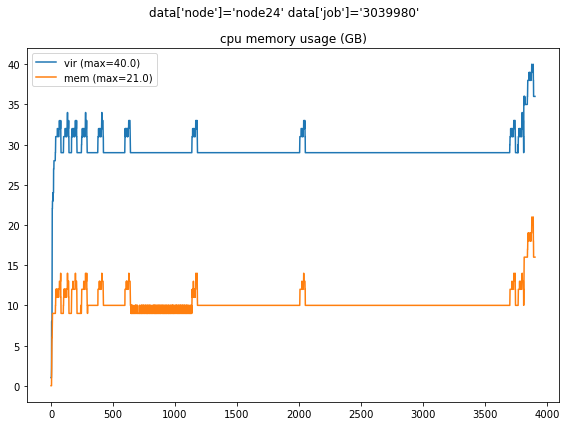

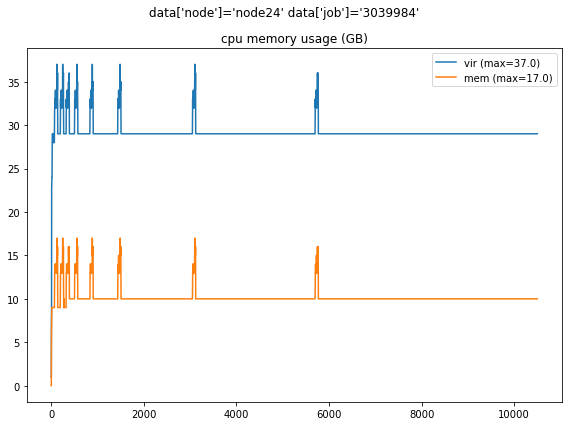

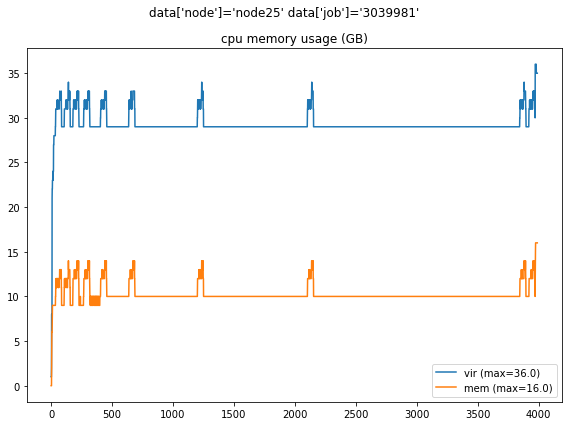

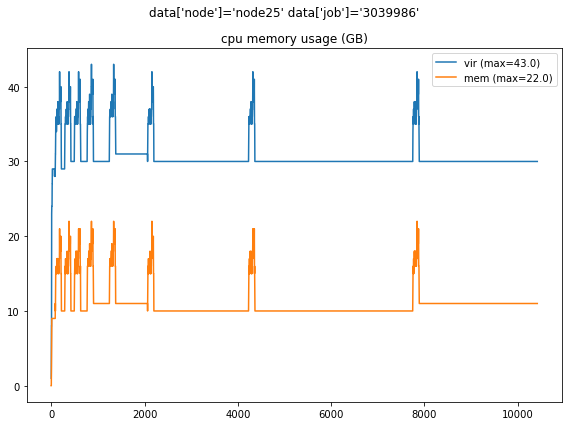

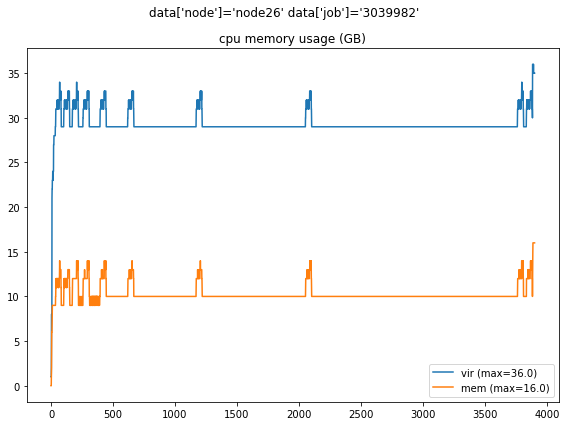

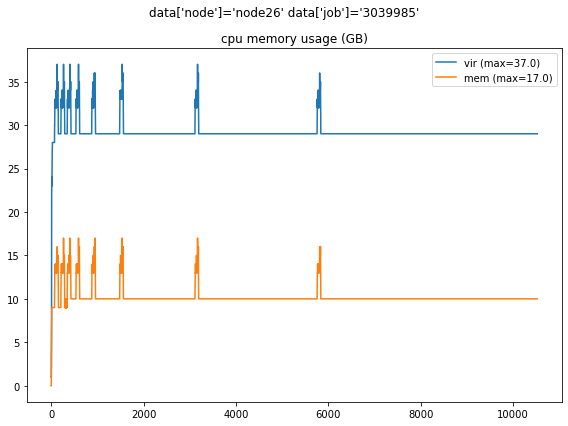

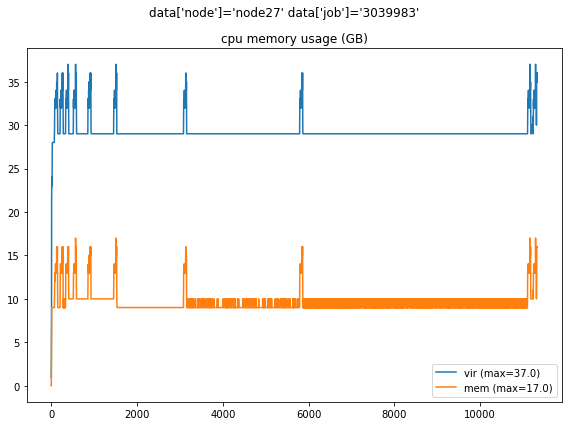

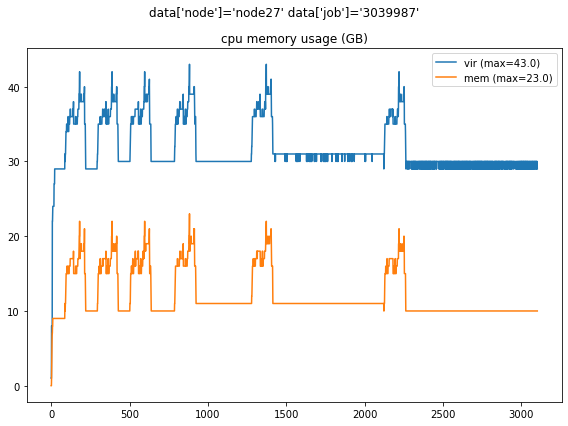

In [65]:

for data in logs:
    vir = data["mem.vir"]
    mem = data["mem.mem"]
    
    fig, axs = plt.subplots(1, 1, figsize=(8, 6))
    ax_mem = axs
    
    ax_mem.plot(vir, label=f"vir (max={np.max(vir)})")
    ax_mem.plot(mem, label=f"mem (max={np.max(mem)})")
    ax_mem.legend()
    ax_mem.set_title("cpu memory usage (GB)")
    
    fig.suptitle(f"{data['node']=} {data['job']=}")
    fig.set_tight_layout(True)


from the respective `.log` files

`slurmstepd: error: Job 3039981 exceeded memory limit (84628888 > 67108864), being killed`

`slurmstepd: error: Job 3039980 exceeded memory limit (85374436 > 67108864), being killed`

In [55]:
84628888 / 1024**2

80.7083969116211

In [56]:
67108864 / 1024**2

64.0

64G is how much i allocated...